<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Line_Through_Points_(Very_Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Line Through Points

You're given an array of points plotted on a 2D graph (the xy-plane). Write a function that returns the maximum number of points that a single line (or potentially multiple lines) on the graph passes through.

The input array will contain points represented by an array of two integers `[x, y]`. The input array will never contain duplicate points and will always contain at least one point.

Sample Input

```
points = [
  [1, 1],
  [2, 2],
  [3, 3],
  [0, 4],
  [-2, 6],
  [4, 0],
  [2, 1],
]
```



Sample Output

```
4 // A line passes through points: [-2, 6], [0, 4], [2, 2], [4, 0].
```



# Solution 1

In [ ]:
# Time O(n^2)
# Space O(n^2)

def lineThroughPoints(points):
  if len(points) == 1:
    return 1

  line_point_map = {}
  for i in range(len(points)):
    for j in range(i + 1, len(points)):
      point1_x, point1_y = points[i]
      point2_x, point2_y = points[j]
      if point2_x != point1_x:
        m = (point2_y - point1_y) / (point2_x - point1_x)
        c = point1_y - (m * point1_x)
        line = (m, c)
      else:
        line = (point1_x)
    
      if line not in line_point_map:
        line_point_map[line] = set()
        line_point_map[line].add(tuple(points[i]))
      line_point_map[line].add(tuple(points[j]))


  max_points = 0
  for key, value in line_point_map.items():
    max_points = max(max_points, len(value))
  return max_points

In [ ]:
points = [
  [1, 1],
  [2, 2],
  [3, 3],
  [0, 4],
  [-2, 6],
  [4, 0],
  [2, 1],
]

In [ ]:
lineThroughPoints(points)

4

In [ ]:
points= [[0, 0]]

In [ ]:
lineThroughPoints(points)

1

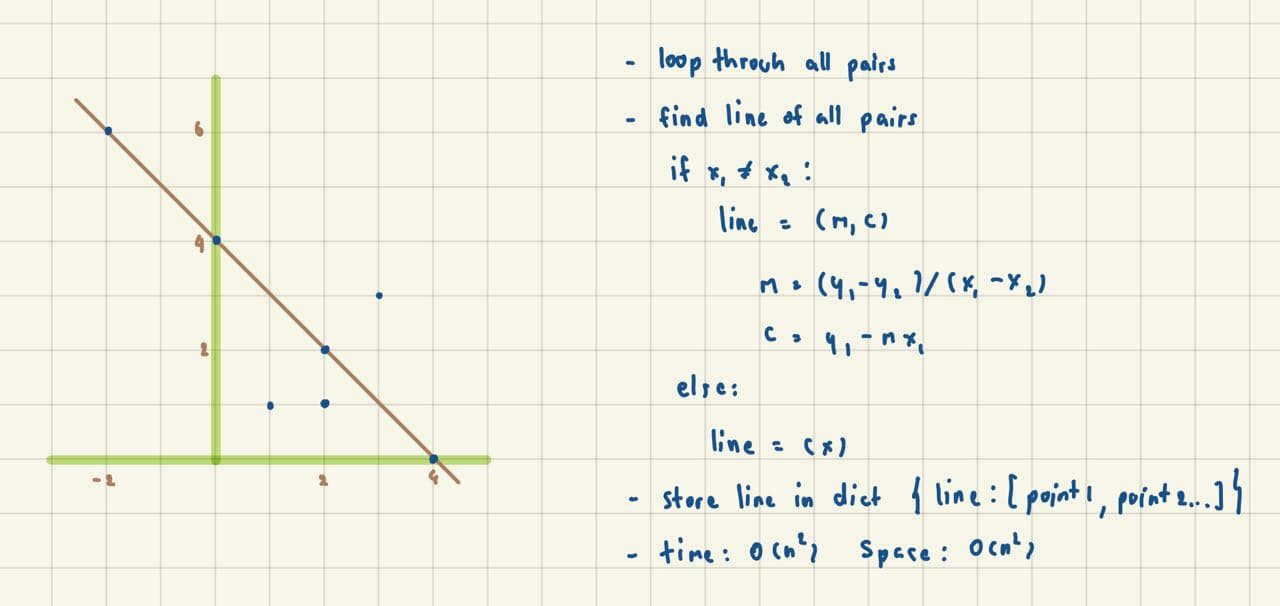

# Solution 2

In [9]:
# Time O(n^2)
# Space O(n)

def lineThroughPoints(points):
  max_num_points = 1
  
  for idx1 in range(len(points)):
    slopes = {}
    p1 = points[idx1]
    for idx2 in range(idx1 + 1, len(points)):
      p2 = points[idx2]
      rise, run = get_slope(p1, p2)
      slope_key = create_hashable_key(rise, run)
      if slope_key not in slopes:
        slopes[slope_key] = 1
      slopes[slope_key] += 1

    max_num_points = max(max_num_points, max(slopes.values(), default=0))
    print(slopes)

  return max_num_points

def get_slope(p1, p2):
  p1x, p1y = p1
  p2x, p2y = p2
  
  # vertical line : slope = [1, 0]
  # horizontal line : slope = [0, 1]
  # because get_gcd(a,0) = a

  x_diff = p1x - p2x
  y_diff = p1y - p2y
  gcd = get_greatest_common_divisor(abs(x_diff), abs(y_diff))
  x_diff = x_diff // gcd
  y_diff = y_diff // gcd
  if x_diff < 0:
    x_diff *= -1 # move negative to y_diff (rise)
    y_diff *= -1
  slope = [y_diff, x_diff] # slope = [rise, run]

  return slope

def create_hashable_key(numerator, denominator):
  return (numerator, denominator)

def get_greatest_common_divisor(num1, num2):
  a = num1
  b = num2
  while True:
    if a == 0:
      return b
    if b == 0:
      return a
    a, b = b, a % b

In [10]:
get_greatest_common_divisor(4, 0)

4

In [11]:
points = [
  [1, 1],
  [2, 2],
  [3, 3],
  [0, 4],
  [-2, 6],
  [4, 0],
  [2, 1],
]
lineThroughPoints(points)

{(1, 1): 3, (-3, 1): 2, (-5, 3): 2, (-1, 3): 2, (0, 1): 2}
{(1, 1): 2, (-1, 1): 4, (1, 0): 2}
{(-1, 3): 2, (-3, 5): 2, (-3, 1): 2, (2, 1): 2}
{(-1, 1): 3, (-3, 2): 2}
{(-1, 1): 2, (-5, 4): 2}
{(-1, 2): 2}
{}


4

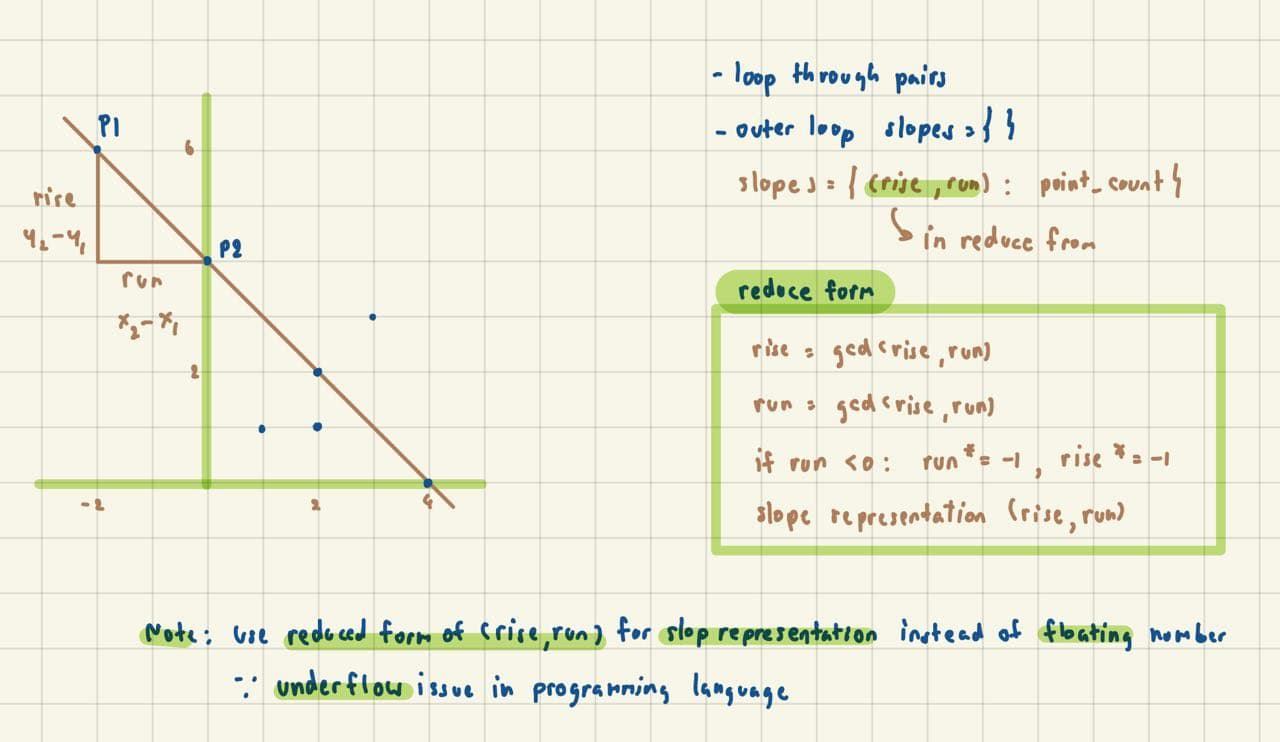